<a href="https://colab.research.google.com/github/VeldiHruthika/Task-5-Decision-Trees-and-Random-Forests/blob/main/Task_5_Decision_Trees_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

# **Load Dataset**

In [25]:
# Load the Heart Disease dataset
df = pd.read_csv('heart.csv')

In [26]:
# Split Features and Target
X = df.drop('target', axis=1)  # All columns except 'target'
y = df['target']               # Target column (0 or 1)

In [27]:
# Display dataset shape and target distribution
print("Dataset Shape:", X.shape)
print("\nTarget Class Distribution:\n", y.value_counts())

Dataset Shape: (1025, 13)

Target Class Distribution:
 target
1    526
0    499
Name: count, dtype: int64


# **Train-Test Split**

In [28]:
# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Train a Decision Tree Classifier**

In [29]:
# Train a simple Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
# Predict on test data
dt_preds = dt_model.predict(X_test)

# Check accuracy
dt_accuracy = accuracy_score(y_test, dt_preds)
print("\nDecision Tree Test Accuracy:", dt_accuracy)


Decision Tree Test Accuracy: 0.9853658536585366


# **Visualize the Decision Tree**

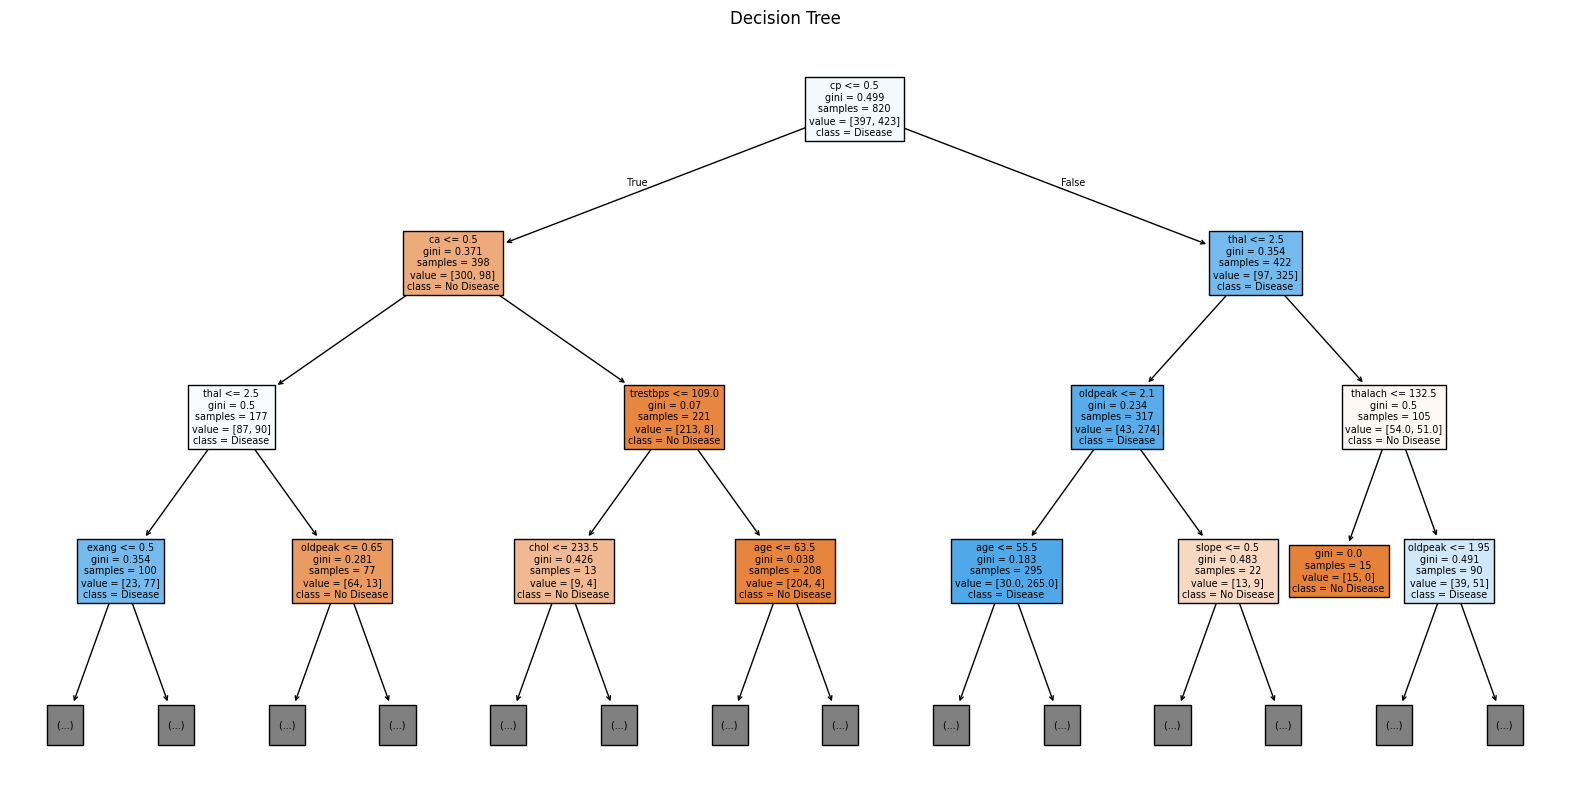

In [31]:
# Visualize first few levels of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, max_depth=3)
plt.title("Decision Tree")
plt.show()

# **Control Overfitting by Limiting Tree Depth**

In [32]:
# Limit tree depth to avoid overfitting
dt_pruned = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
pruned_preds = dt_pruned.predict(X_test)

In [33]:
# Check pruned tree accuracy
pruned_accuracy = accuracy_score(y_test, pruned_preds)
print("\nPruned Decision Tree Test Accuracy (max_depth=4):", pruned_accuracy)


Pruned Decision Tree Test Accuracy (max_depth=4): 0.8


# **Train a Random Forest Classifier**

In [34]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict using Random Forest
rf_preds = rf_model.predict(X_test)

In [36]:
# Check accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Test Accuracy:", rf_accuracy)


Random Forest Test Accuracy: 0.9853658536585366


# **Compare Decision Tree and Random Forest Accuracy**

In [37]:
# Compare Accuracies
print("\nAccuracy Comparison:")
print(f"Decision Tree: {dt_accuracy:.3f}")
print(f"Pruned Decision Tree: {pruned_accuracy:.3f}")
print(f"Random Forest: {rf_accuracy:.3f}")


Accuracy Comparison:
Decision Tree: 0.985
Pruned Decision Tree: 0.800
Random Forest: 0.985


# **Interpret Feature Importances (Random Forest)**

In [38]:
# Get feature importances from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [39]:
print("\nTop 10 Important Features from Random Forest:")
print(feature_importance_df.head(10))


Top 10 Important Features from Random Forest:
     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782


# **Cross-Validation on Random Forest**

In [40]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)

print("\nRandom Forest Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Random Forest Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073
